Setting up iPython

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import *

We choose an integrand as (say) a function of $W_t$, which we will approximate by Simple functions, and compute the integral.

In [7]:
#Normal Increments
noiseT = lambda N,T: np.random.normal(0,sqrt(T/float(N)),N)

# Number of time steps:
N = 100000
t = np.linspace(0,1,N+1) # time discretisation
# append a 0 to the start of the noise vector, and compute the cumulative sum:
W = cumsum(np.hstack((arange(1),noiseT(N,1))))

# Function defining integrand:
f = lambda x: x

ff = np.vectorize(f)

Compute the integral $\int_0^1 f(W_s) \, \mathrm{d} W_s$, by approximating $f(W_s)$ at intervals of size $\Delta t$.

In [8]:
def Ito(W,f,Dt):
        "This computes the Ito integral of W against itself"
        M = W.size
        NN = int(np.ceil(Dt*M))
        f_vec = np.vectorize(f)
        I1 = f(W[0:(M+1):NN])
        I1 = I1.repeat(NN)
        I1 = I1[0:M]        
        I2 = I1[0:(M-1)]*np.diff(W[0:(M+1)])
        I2 = concatenate((range(0,1),cumsum(I2)))
        return I1, I2

Plot the resulting processes and the integral:

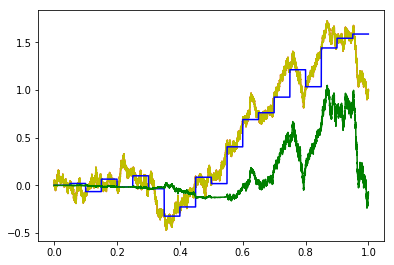

In [11]:
%matplotlib inline

Simp, Integral = Ito(W,f,0.05)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(t, W , 'r')
axes.plot(t, ff(W), 'y')
axes.plot(t, Simp, 'b')
axes.plot(t, Integral, 'g')


Let's compare the resulting integral with a candidate solution:

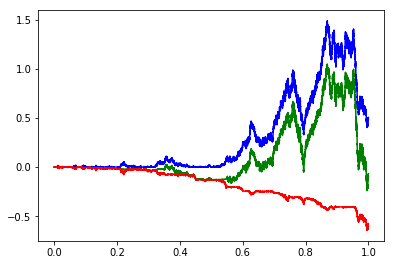

In [12]:
g = lambda x: x*x/2.0
gg = np.vectorize(g)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(t, Integral, 'g')
axes.plot(t, gg(W), 'b')
axes.plot(t,Integral-gg(W),'r')

What we expect to see (assuming we've chosen $g$ correctly) is that for small time-steps, the approximation is good, and the red line is zero (or at least, a nice function of $t$).